In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import datetime
import time

In [58]:
SALES = pd.read_csv('E:/ymx/BUAN6390(实习课)/datasets/DATA/POC-DATA-SALES.csv',engine = 'python')

In [59]:
CUS_2018 = pd.read_csv('E:/ymx/BUAN6390(实习课)/datasets/DATA/POC-DATA-CUSTOMER&2018PLAN.csv',engine = 'python')

In [60]:
sales = pd.merge(SALES,CUS_2018,on = 'CustomerID')

In [61]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566309 entries, 0 to 566308
Data columns (total 20 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
 Year               566309 non-null object
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null object
Shipper             566309 non-null object
COST                566309 non-null object
EXT COST            566309 non-null float64
REGION_x            566309 non-null object
SALES P_x           566309 non-null object
Unnamed: 15         166199 non-null float64
REGION_y            566309 non-null object
SALES PERSON        566309 non-null object
 PLAN 2018          556326 non-null object
SALES P_y           556326 non-null object
dtypes: float64(5), int64

In [62]:
sales_1= sales.drop(columns=['Unnamed: 15'])

In [63]:
sales_1 = sales_1.drop(columns=['REGION_y'])

In [64]:
sales_1 = sales_1[~sales_1['EXT COST'].isin([0])]

In [65]:
sales_1 =sales_1[ ~ sales_1['Invoice Date'].str.contains('2/29/2018')]

In [66]:
sales_1[sales_1['Invoice Date'] == '2/29/2018']

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION_x,SALES P_x,SALES PERSON,PLAN 2018,SALES P_y


In [67]:
sales_1.describe()

,Quantity Shipped,UnitPrice,Ext-Price,CustomerID,EXT COST
count,562106.000000,562106.000000,562106.000000,562106.000000,562106.000000
mean,59.000667,1.268590,81.179558,15349.937914,68.397089
std,1268.983633,1.012581,2019.521203,1731.779961,1523.165660
min,0.060000,0.084000,0.124440,12346.000000,0.060097
25%,3.823200,0.950000,3.815336,13959.000000,3.268959
50%,10.000000,1.097000,10.836000,15287.500000,9.482224
75%,24.000000,1.354000,27.272092,16919.000000,24.637033
max,664224.250000,188.186000,750573.402500,18287.000000,855425.223500


用户平均购买58.98个商品，标准差为1268.726258，中位数为10个商品，75分为数为24个商品，说明大部分订单的购买量都不多。单个用户购买商品最大值为664224.25个。
一般而言，消费了数据都会呈现二八定律，即20%的客户贡献了80%的订单量或销量。

In [69]:
sales_1['Invoice Date'] = pd.to_datetime(sales_1['Invoice Date'], format = '%Y/%m/%d') 

In [70]:
sales_1.dropna(how = 'all',inplace=True)

In [71]:
sales_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562106 entries, 0 to 566308
Data columns (total 18 columns):
InvoiceNo           562106 non-null object
StockCode           562106 non-null object
Quantity Shipped    562106 non-null float64
 Year               562106 non-null object
Invoice Date        562106 non-null datetime64[ns]
UnitPrice           562106 non-null float64
Ext-Price           562106 non-null float64
CustomerID          562106 non-null int64
Country             562106 non-null object
GM%                 562106 non-null object
Shipper             562106 non-null object
COST                562106 non-null object
EXT COST            562106 non-null float64
REGION_x            562106 non-null object
SALES P_x           562106 non-null object
SALES PERSON        562106 non-null object
 PLAN 2018          552188 non-null object
SALES P_y           552188 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(12)
memory usage: 81.5+ MB


In [72]:
customer = pd.read_csv('E:/ymx/BUAN6390(实习课)/datasets/DATA/cluster segmentation.csv',engine = 'python')

In [5]:
product = pd.read_csv('E:/ymx/BUAN6390(实习课)/datasets/DATA/ABC product.csv',engine = 'python')

In [4]:
product_c = pd.read_csv('E:/ymx/BUAN6390(实习课)/datasets/DATA/POC-DATA-PRODUCT.csv',engine = 'python')

In [6]:
productABC_c = pd.merge(product,product_c,on='StockCode')

In [11]:
productABC_c = productABC_c.drop(columns=['Unnamed: 7'])

In [13]:
productABC_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3296
Data columns (total 5 columns):
StockCode        3297 non-null object
EXTENDED COST    3297 non-null float64
%                3297 non-null object
Cluster          3297 non-null object
Commodity        3297 non-null object
dtypes: float64(1), object(4)
memory usage: 154.5+ KB


In [14]:
productABC_c.to_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\ABCmerge.csv')

In [44]:
productABC_c['Commodity'].value_counts()

Screw     788
Washer    671
Bolt      626
Nut       620
Studs     592
Name: Commodity, dtype: int64

In [22]:
clusterorder = productABC_c.groupby(['Cluster'])

In [73]:
customer = pd.merge(sales_1,customer,on='CustomerID')

In [74]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407292 entries, 0 to 407291
Data columns (total 23 columns):
InvoiceNo           407292 non-null object
StockCode           407292 non-null object
Quantity Shipped    407292 non-null float64
 Year               407292 non-null object
Invoice Date        407292 non-null datetime64[ns]
UnitPrice           407292 non-null float64
Ext-Price           407292 non-null float64
CustomerID          407292 non-null int64
Country             407292 non-null object
GM%                 407292 non-null object
Shipper             407292 non-null object
COST                407292 non-null object
EXT COST            407292 non-null float64
REGION_x            407292 non-null object
SALES P_x           407292 non-null object
SALES PERSON        407292 non-null object
 PLAN 2018          399808 non-null object
SALES P_y           399808 non-null object
R                   407292 non-null float64
F                   407292 non-null float64
M               

In [75]:
total = pd.merge(productABC_c,customer,on='StockCode')

In [76]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386959 entries, 0 to 386958
Data columns (total 27 columns):
StockCode           386959 non-null object
EXTENDED COST       386959 non-null float64
%                   386959 non-null object
Cluster             386959 non-null object
Commodity           386959 non-null object
InvoiceNo           386959 non-null object
Quantity Shipped    386959 non-null float64
 Year               386959 non-null object
Invoice Date        386959 non-null datetime64[ns]
UnitPrice           386959 non-null float64
Ext-Price           386959 non-null float64
CustomerID          386959 non-null int64
Country             386959 non-null object
GM%                 386959 non-null object
Shipper             386959 non-null object
COST                386959 non-null object
EXT COST            386959 non-null float64
REGION_x            386959 non-null object
SALES P_x           386959 non-null object
SALES PERSON        386959 non-null object
 PLAN 2018       

In [77]:
total.to_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\everythingweneed.csv')

In [3]:
rawdata = pd.read_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\everythingweneed.csv',engine = 'python')

In [6]:
rawdata.describe()

,Unnamed: 0,EXTENDED COST,Quantity Shipped,UnitPrice,Ext-Price,CustomerID,COST,EXT COST,R,F,M,QCL_1,QCL_2
count,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000
mean,193479.000000,20405.659606,49.993744,1.261414,64.547762,15433.765629,1.106173,57.164417,-0.134528,0.020952,0.118849,2.830209,0.123752
std,111705.585745,34975.106007,454.787723,0.966055,568.226564,1720.754523,0.621329,482.770463,0.149476,0.083524,0.252659,1.374284,0.099737
min,0.000000,0.280000,0.060000,0.084000,0.124440,12347.000000,0.080000,0.060097,-0.232724,-0.049306,-0.118145,1.000000,0.005008
25%,96739.500000,2326.020000,4.000000,0.949000,4.119950,14031.000000,0.850000,3.527818,-0.219557,-0.030606,-0.071465,1.000000,0.059811
50%,193479.000000,7557.180000,10.000000,1.094000,11.841329,15491.000000,1.110000,10.518476,-0.209682,-0.007580,0.015522,4.000000,0.093309
75%,290218.500000,20946.470000,25.800000,1.347000,28.938000,16923.000000,1.290000,26.774570,-0.133974,0.040941,0.241726,4.000000,0.160857
max,386958.000000,437744.610000,90279.360000,130.328000,81910.743000,18287.000000,33.940000,63893.004490,0.436578,0.655548,0.875252,4.000000,0.565350


我们将rawdata按照customer segmentation分成4部分

Cluster1——Retain

In [4]:
c1 = pd.read_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\cluster\cluster1.csv',engine = 'python')

Cluster12——Standard

In [7]:
c2 = pd.read_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\cluster\cluster2.csv',engine = 'python')

Cluster3——Prospect

In [8]:
c3 = pd.read_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\cluster\cluster3.csv',engine = 'python')

Cluster4——Drain

In [9]:
c4 = pd.read_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\cluster\cluster4.csv',engine = 'python')

Scoring System

In [10]:
c1.describe()

,EXTENDED COST,Quantity Shipped,UnitPrice,Ext-Price,CustomerID,COST,EXT COST,R,F,M,QCL_1,QCL_2
count,121813.000000,121813.000000,121813.000000,121813.000000,121813.000000,121813.000000,121813.000000,121813.000000,121813.000000,121813.000000,121813.0,121813.000000
mean,20287.505819,65.026907,1.284143,86.929978,15638.797091,1.092114,75.120221,-0.210005,0.073144,0.435184,1.0,0.196747
std,34377.455180,711.409032,1.170986,882.127892,1737.509129,0.618025,734.447717,0.032977,0.067882,0.211719,0.0,0.131467
min,0.930000,0.060000,0.085000,0.124440,12359.000000,0.270000,0.060097,-0.232724,-0.049306,0.155328,1.0,0.028566
25%,2310.770000,4.000000,0.937000,4.145000,14142.000000,0.840000,3.569070,-0.225043,0.019596,0.260781,1.0,0.095972
50%,7639.670000,10.000000,1.099000,11.437200,15719.000000,1.100000,9.980055,-0.219557,0.056960,0.396903,1.0,0.162618
75%,20982.570000,25.000000,1.374000,28.612200,17284.000000,1.270000,25.939255,-0.211877,0.117308,0.597335,1.0,0.242039
max,437744.610000,90279.360000,130.328000,81910.743000,18283.000000,25.590000,63893.004490,0.261023,0.236471,0.875252,1.0,0.565350


In [12]:
c1['Revenue'] = c1['Ext-Price']-c1['EXT COST']

In [18]:
c1.to_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\cluster\cluster1.csv')

初级客户行为分析

In [2]:
rawdata = pd.read_csv('E:\ymx\BUAN6390(实习课)\datasets\DATA\everythingweneed.csv',engine = 'python')

In [3]:
rawdata['Revenue'] = rawdata['Ext-Price']-rawdata['EXT COST']

In [6]:
rawdata.describe()

,EXTENDED COST,Quantity Shipped,UnitPrice,Ext-Price,CustomerID,COST,EXT COST,R,F,M,QCL_1,QCL_2,Revenue
count,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000,386959.000000
mean,20405.659606,49.993744,1.261414,64.547762,15433.765629,1.106173,57.164417,-0.134528,0.020952,0.118849,2.830209,0.123752,7.383345
std,34975.106007,454.787723,0.966055,568.226564,1720.754523,0.621329,482.770463,0.149476,0.083524,0.252659,1.374284,0.099737,190.671564
min,0.280000,0.060000,0.084000,0.124440,12347.000000,0.080000,0.060097,-0.232724,-0.049306,-0.118145,1.000000,0.005008,-13707.460000
25%,2326.020000,4.000000,0.949000,4.119950,14031.000000,0.850000,3.527818,-0.219557,-0.030606,-0.071465,1.000000,0.059811,-0.475879
50%,7557.180000,10.000000,1.094000,11.841329,15491.000000,1.110000,10.518476,-0.209682,-0.007580,0.015522,4.000000,0.093309,0.239071
75%,20946.470000,25.800000,1.347000,28.938000,16923.000000,1.290000,26.774570,-0.133974,0.040941,0.241726,4.000000,0.160857,2.528919
max,437744.610000,90279.360000,130.328000,81910.743000,18287.000000,33.940000,63893.004490,0.436578,0.655548,0.875252,4.000000,0.565350,39393.943410


In [5]:
rawdata = rawdata.drop(columns=['Unnamed: 0'])

In [13]:
variable = rawdata.groupby(['CustomerID','QCL_1'],as_index = False).agg({'Ext-Price':sum,'Quantity Shipped':sum,'Ext-Price':sum,'EXT COST':sum,'Invoice Date':max,'Revenue':sum})

In [14]:
variable

,CustomerID,QCL_1,Ext-Price,Quantity Shipped,EXT COST,Invoice Date,Revenue
0,12347,4,22671.770513,20196.180320,21590.329966,2018-12-06,1081.440547
1,12348,4,20104.633584,17308.104000,20012.236511,2018-12-15,92.397073
2,12349,2,852.563105,683.607500,753.106478,2017-11-21,99.456627
3,12350,4,1001.086558,888.429250,1011.021980,2018-08-01,-9.935422
4,12352,4,1655.186891,1247.669950,1587.941067,2018-09-18,67.245824
5,12353,4,371.318541,170.461000,295.422257,2018-10-06,75.896284
6,12354,4,18200.350314,10396.892528,12239.448405,2018-10-19,5960.901909
7,12355,4,1793.657808,1354.481675,1686.200082,2018-11-06,107.457725
8,12356,4,3257.705093,2840.924645,3340.339871,2018-09-26,-82.634778
9,12357,2,11305.430476,9122.788750,10527.527117,2017-11-06,777.903360


In [15]:
variable.describe()

,CustomerID,QCL_1,Ext-Price,Quantity Shipped,EXT COST,Revenue
count,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000
mean,15290.868535,3.123567,6363.652829,4928.797260,5635.741585,727.911244
std,1721.403929,1.062889,11904.226153,9336.031414,10395.677773,2570.597424
min,12347.000000,1.000000,1.017000,1.000000,0.766065,-11983.148398
25%,13807.000000,2.000000,576.787615,474.478250,523.698802,9.840650
50%,15277.000000,4.000000,1954.475858,1519.425000,1733.558649,109.483119
75%,16774.000000,4.000000,6239.881947,4928.636000,5749.116932,510.920966
max,18287.000000,4.000000,91974.371818,103682.105550,102306.341338,47743.981000


同时可见用户平均每笔订单购买4928个商品，标准差在9336，极具有波动性。中位数在1519个商品，75分位数在4928个商品，说明绝大部分订单的购买量都很多。最大值在103682个，数字比较高。购买金额的情况差不多，大部分订单都使得公司盈利，平均盈利728。

In [113]:
behavior = pd.concat([rawdata['CustomerID'],rawdata['QCL_1'],rawdata['Ext-Price'],rawdata['EXT COST'],rawdata['Revenue'],rawdata['Quantity Shipped'],rawdata['Invoice Date'],rawdata['GM%']],axis=1)

In [114]:
behavior.head()

,CustomerID,QCL_1,Ext-Price,EXT COST,Revenue,Quantity Shipped,Invoice Date,GM%
0,15618,2,45.19800,51.685421,-6.487421,40.50,2017-11-07,-14%
1,13717,4,31.86000,34.456947,-2.596947,27.00,2017-04-13,-8%
2,13717,4,331.78545,308.389678,23.395773,241.65,2018-05-13,7%
3,17554,2,154.95867,133.348386,21.610284,104.49,2017-11-23,14%
4,17554,2,458.59500,370.412182,88.182818,290.25,2017-10-11,19%


In [115]:
behavior['Invoice Date'] = pd.to_datetime(behavior['Invoice Date'], format = '%Y/%m/%d') 

In [116]:
behavior['Month'] = behavior['Invoice Date'].astype('datetime64[M]')

In [117]:
behavior.head()

,CustomerID,QCL_1,Ext-Price,EXT COST,Revenue,Quantity Shipped,Invoice Date,GM%,Month
0,15618,2,45.19800,51.685421,-6.487421,40.50,2017-11-07,-14%,2017-11-01
1,13717,4,31.86000,34.456947,-2.596947,27.00,2017-04-13,-8%,2017-04-01
2,13717,4,331.78545,308.389678,23.395773,241.65,2018-05-13,7%,2018-05-01
3,17554,2,154.95867,133.348386,21.610284,104.49,2017-11-23,14%,2017-11-01
4,17554,2,458.59500,370.412182,88.182818,290.25,2017-10-11,19%,2017-10-01


月销量

In [118]:
month_ship_product = behavior.groupby('Month').agg({'Quantity Shipped':sum})

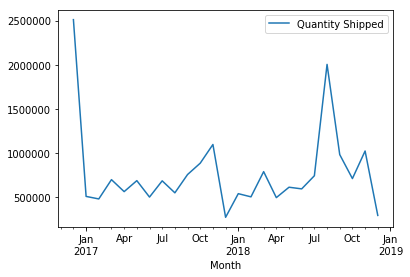

In [119]:
month_ship_product.plot()

月盈利

In [120]:
month_revenue_product = behavior.groupby('Month').agg({'Revenue':sum})

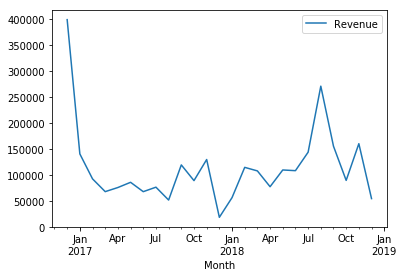

In [121]:
month_revenue_product.plot()

同时可以从用户角度进行数据观察，分析每位用户的购买数量和交易盈利

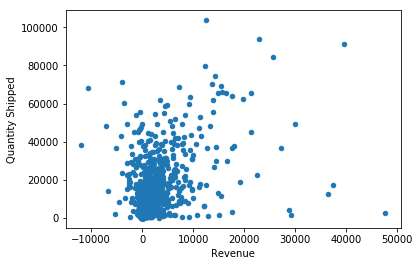

In [122]:
group_id = behavior.groupby('CustomerID')
group_id_sum = group_id.sum()
group_id_sum.plot.scatter(x='Revenue',y = 'Quantity Shipped')

观察用户首次消费和最后一次消费的时间

In [123]:
group_id_month_min = group_id['Month'].min().value_counts()

In [124]:
group_id_month_max = group_id['Month'].max().value_counts()

In [125]:
group_id_month_min

2016-12-01    708
2017-01-01    356
2017-03-01    353
2017-10-01    314
2017-02-01    303
2017-09-01    298
2017-04-01    295
2017-05-01    293
2017-11-01    293
2017-06-01    210
2017-07-01    192
2017-08-01    161
2017-12-01     45
2018-04-01     25
2018-06-01     20
2018-02-01     14
2018-01-01     14
2018-12-01     12
2018-07-01      6
2018-03-01      6
2018-05-01      6
2018-10-01      1
Name: Month, dtype: int64

In [126]:
group_id_month_max

2018-12-01    994
2017-11-01    480
2018-10-01    412
2018-09-01    338
2017-10-01    308
2018-11-01    305
2018-07-01    207
2017-09-01    199
2017-12-01    169
2018-08-01    139
2017-07-01    106
2017-08-01    100
2018-06-01     65
2017-05-01     43
2017-06-01     19
2018-05-01     17
2018-04-01     11
2018-03-01      7
2018-02-01      5
2017-04-01      1
Name: Month, dtype: int64

In [137]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386959 entries, 0 to 386958
Data columns (total 9 columns):
CustomerID          386959 non-null int64
QCL_1               386959 non-null int64
Ext-Price           386959 non-null float64
EXT COST            386959 non-null float64
Revenue             386959 non-null float64
Quantity Shipped    386959 non-null float64
Invoice Date        386959 non-null datetime64[ns]
GM%                 386959 non-null object
Month               386959 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 26.6+ MB


In [149]:
behavior['GM%'] = behavior['GM%'].apply(lambda x: x.replace('%', '')).astype('float') / 100

In [150]:
gm = behavior['GM%'].apply(lambda x:1 if x > 0 else 0)

In [152]:
behavior['GM'] = gm

In [156]:
earn = behavior.drop(columns = ['GM%'])

In [158]:
earn.head()

,CustomerID,QCL_1,Ext-Price,EXT COST,Revenue,Quantity Shipped,Invoice Date,Month,GM
0,15618,2,45.19800,51.685421,-6.487421,40.50,2017-11-07,2017-11-01,0
1,13717,4,31.86000,34.456947,-2.596947,27.00,2017-04-13,2017-04-01,0
2,13717,4,331.78545,308.389678,23.395773,241.65,2018-05-13,2018-05-01,1
3,17554,2,154.95867,133.348386,21.610284,104.49,2017-11-23,2017-11-01,1
4,17554,2,458.59500,370.412182,88.182818,290.25,2017-10-11,2017-10-01,1


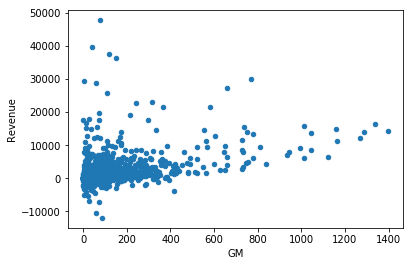

In [162]:
earn_id = earn.groupby('CustomerID')
earn_id_sum = earn_id.sum()
earn_id_sum.plot.scatter(x='GM',y = 'Revenue')

In [232]:
rank001 = earn.groupby(['CustomerID','QCL_1'],as_index = False).agg({'Revenue':sum,'Quantity Shipped':sum,'Invoice Date':max,'GM':sum})

In [233]:
rank001.describe()

,CustomerID,QCL_1,Revenue,Quantity Shipped,GM
count,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000
mean,15290.868535,3.123567,727.911244,4928.797260,57.774777
std,1721.403929,1.062889,2570.597424,9336.031414,108.241764
min,12347.000000,1.000000,-11983.148398,1.000000,0.000000
25%,13807.000000,2.000000,9.840650,474.478250,10.000000
50%,15277.000000,4.000000,109.483119,1519.425000,25.000000
75%,16774.000000,4.000000,510.920966,4928.636000,61.000000
max,18287.000000,4.000000,47743.981000,103682.105550,1395.000000


这边按照4分段进行评分，0-25% = 1,25%-50% = 2，50%-75% = 3,75%-100% =4

In [234]:
rank002 = rank001['Revenue'].apply(lambda x:1 if 0<= x < 9.840650 else 2 if 9.840650 <= x < 109.483119 else 3 if 109.483119 <= x < 510.920966 else 4)

In [235]:
rank001['Revenue'] =  rank002

In [236]:
rank003 = rank001['Quantity Shipped'].apply(lambda x:1 if 0<= x < 474.478250 else 2 if 474.478250 <= x < 1519.425000 else 3 if 1519.425000 <= x < 4928.636000 else 4)

In [237]:
rank001['Quantity Shipped'] =  rank003

In [238]:
Enddate = datetime.datetime(2019,1,15)

In [239]:
rank001['R'] = Enddate-rank001['Invoice Date']

In [240]:
rank001 = rank001.drop(columns =['Invoice Date'])

In [241]:
rank001.describe()

,CustomerID,QCL_1,Revenue,Quantity Shipped,GM,R
count,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925
mean,15290.868535,3.123567,3.028280,2.500382,57.774777,221 days 19:06:07.796178
std,1721.403929,1.062889,0.985866,1.118290,108.241764,188 days 15:52:32.519633
min,12347.000000,1.000000,1.000000,1.000000,0.000000,19 days 00:00:00
25%,13807.000000,2.000000,2.000000,2.000000,10.000000,44 days 00:00:00
50%,15277.000000,4.000000,3.000000,3.000000,25.000000,127 days 00:00:00
75%,16774.000000,4.000000,4.000000,4.000000,61.000000,426 days 00:00:00
max,18287.000000,4.000000,4.000000,4.000000,1395.000000,629 days 00:00:00


In [242]:
rank001['R'] = rank001['R'].index

In [243]:
rank004 = rank001['R'].apply(lambda x:1 if 426 <= x < 629 else 2 if 127 <= x < 426 else 3 if 44 <= x < 127 else 4)

In [244]:
rank001['R'] = rank004

In [246]:
rank001['Rank'] = rank001['Revenue'] + rank001['Quantity Shipped'] + rank001['GM'] + rank001['R']

In [247]:
rank001

,CustomerID,QCL_1,Revenue,Quantity Shipped,GM,R,Rank
0,12347,4,4,4,129,4,141
1,12348,4,2,4,21,4,31
2,12349,2,2,2,33,4,41
3,12350,4,4,2,16,4,26
4,12352,4,2,2,40,4,48
5,12353,4,2,1,5,4,12
6,12354,4,4,4,57,4,69
7,12355,4,2,2,10,4,18
8,12356,4,4,3,23,4,34
9,12357,2,4,4,70,4,82
